In [1]:
# Install necessary libraries if not already installed
!pip install torch torchvision

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os

# Specify the path to your new directory
directory_path = '/content/drive/My Drive/project'

# Check if the directory exists
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f'Directory created at: {directory_path}')
else:
    print(f'Directory already exists at: {directory_path}')

Directory already exists at: /content/drive/My Drive/project


In [15]:
import os

# Set to a known directory that definitely exists
os.chdir('/content/drive/My Drive/')

# Verify the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive


In [16]:
# List the contents of the current directory to confirm its existence and accessibility
!ls

'Colab Notebooks'   Coursera_copy.pdf  'exam fee recipt 90.pdf'   Hm  'My Song 2.band'	 project


In [17]:
# List the contents of the 'project' directory
!ls "/content/drive/My Drive/project"

sup.csv


In [18]:
df = pd.read_csv('/content/drive/My Drive/project/sup.csv')



In [19]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [20]:
# Drop rows with missing Description values
df = df.dropna(subset=['Description'])


In [21]:
# Drop rows with missing CustomerID values
df = df.dropna(subset=['CustomerID'])


In [22]:
# Check the updated dataset
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [23]:
df = df.drop_duplicates()


In [24]:
print("Negative Quantity values:", (df['Quantity'] < 0).sum())
print("Negative UnitPrice values:", (df['UnitPrice'] < 0).sum())


Negative Quantity values: 8872
Negative UnitPrice values: 0


In [25]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()

In [30]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [32]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,TotalAmount
count,392692.000000,392692,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,2010.934631,7.601871,15.044656,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,2010.000000,1.000000,1.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,2011.000000,5.000000,7.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,2011.000000,8.000000,15.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,2011.000000,11.000000,22.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,2011.000000,12.000000,31.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,0.247177,3.415015,8.652532,311.099224


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Year,Month'>

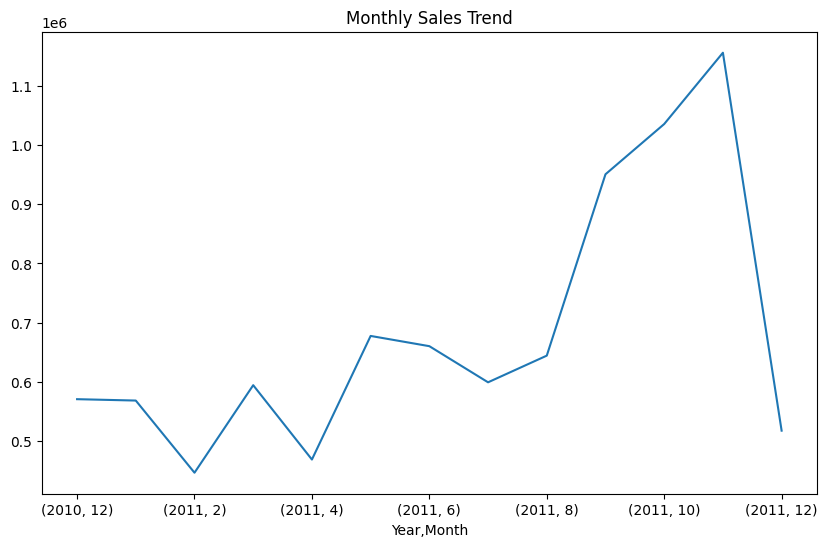

In [33]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalAmount'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10, 6))


In [34]:
# Latest date for recency calculation
latest_date = df['InvoiceDate'].max()

# Create RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display the RFM table
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Description'>

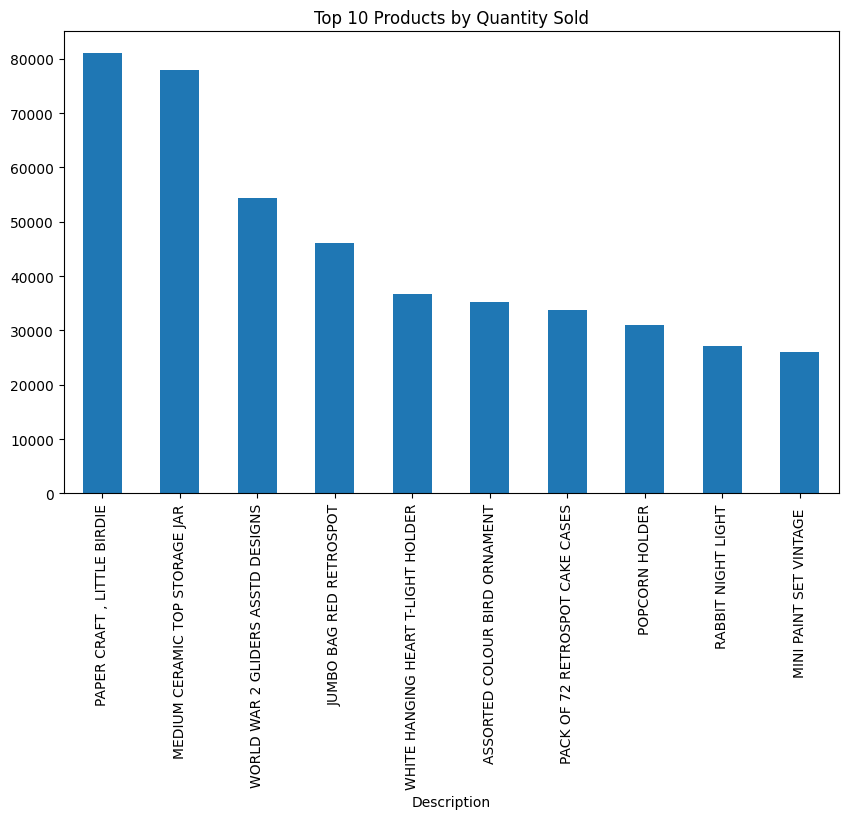

In [35]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold', figsize=(10, 6))


<Axes: title={'center': 'Total Sales by Hour'}, xlabel='Hour'>

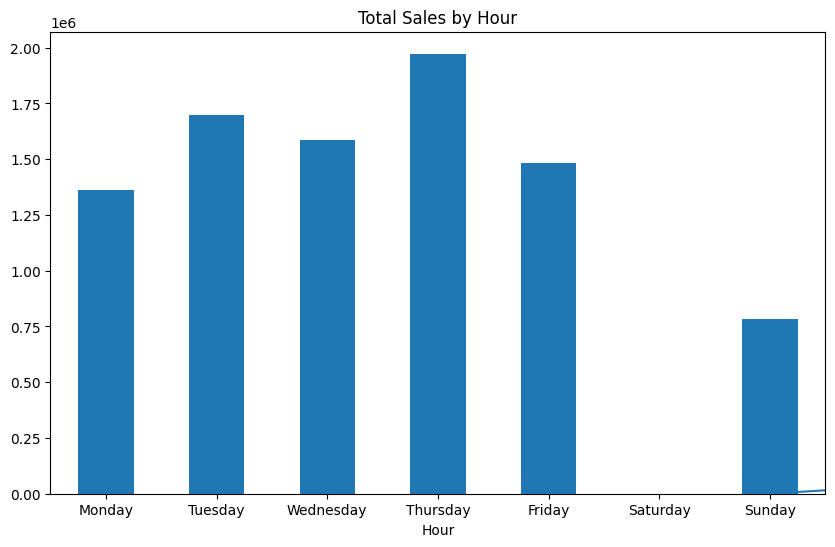

In [36]:
# Adding Hour column
df['Hour'] = df['InvoiceDate'].dt.hour

# Sales by weekday
weekday_sales = df.groupby('Weekday')['TotalAmount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', title='Total Sales by Weekday', figsize=(10, 6))

# Sales by hour
hourly_sales = df.groupby('Hour')['TotalAmount'].sum()
hourly_sales.plot(kind='line', title='Total Sales by Hour', figsize=(10, 6))


In [38]:
print(rfm['Recency'].unique())
print(rfm['Frequency'].unique())
print(rfm['Monetary'].unique())


[325   1  74  18 309  35 203 231 213  22  32  57  51 286   2 109   7 290
   3  50  44  71 310  24  10 314 129  81  21   4 184  28 337  15  79  63
  45 118 302 322  49 148  78 308  66 216  23 112  95   0 162  77 194  25
   8  42  84  99  13 366  20 242  43 155  16 133  55  72  65  70  93  52
   9 187  31  53  27 335  38  62 165 336  17 232 283 142 266 352  59  14
  29 130  91  19  46 197 357 260 288  85  39 226 315  34 246 238 233 210
 316 108  37 189  58  73  56 277  94 275 105 211  89 114 127  33 154 106
 334 330 324  11 150 329  41 371 113 205 126  69   6 291  96 370 179 332
 128  80 235 280  86 116 137 363  64 191 373 256 365 186  36 177 101 147
 261   5 144 282 172 143  30 294 134 372 185  83 326 281  87  67 204 264
 175 138 160 311  54 287 305  88 111 157 195 317 173 356 272  98 249 253
 190  12 178 125 132 268 273 196 107 295  48 312 121  26 267  60 135 239
 199 201 225 202  92 124 156  61 262  40 359 136 168 103 350 119  76 200
 149 254 258 252 183 240 104 274 243 182 318 215 30

In [40]:
rfm['R_score'] = pd.cut(rfm['Recency'], 3, labels=False) + 1  # Reduce to 3 bins
rfm['F_score'] = pd.cut(rfm['Frequency'], 3, labels=False) + 1
rfm['M_score'] = pd.cut(rfm['Monetary'], 3, labels=False) + 1


In [41]:
def rfm_score(rfm):
    # Avoid non-unique edges by using cut or adjusting quantiles
    rfm['R_score'] = pd.qcut(rfm['Recency'], 3, labels=False, duplicates='drop') + 1
    rfm['F_score'] = pd.qcut(rfm['Frequency'], 3, labels=False, duplicates='drop') + 1
    rfm['M_score'] = pd.qcut(rfm['Monetary'], 3, labels=False, duplicates='drop') + 1
    rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
    return rfm

# Apply scoring
rfm = rfm_score(rfm)

# Display RFM with scores
print(rfm.head())


            Recency  Frequency  Monetary  R_score  F_score  M_score RFM_Score
CustomerID                                                                   
12346.0         325          1  77183.60        3        1        3       313
12347.0           1          7   4310.00        1        2        3       123
12348.0          74          4   1797.24        2        1        3       213
12349.0          18          1   1757.55        1        1        3       113
12350.0         309          1    334.40        3        1        1       311


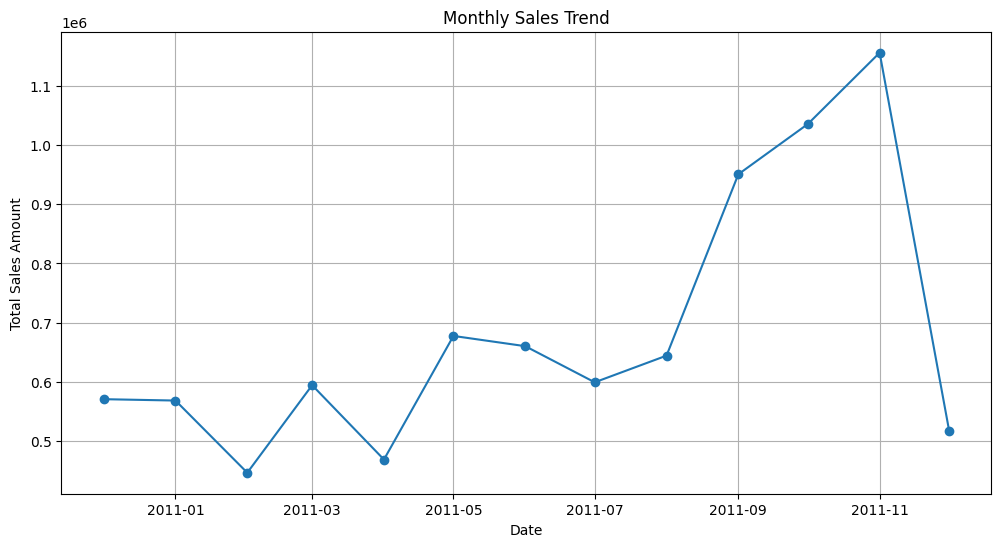

In [42]:
# Aggregate monthly sales and plot
monthly_sales = df.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['TotalAmount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid()
plt.show()


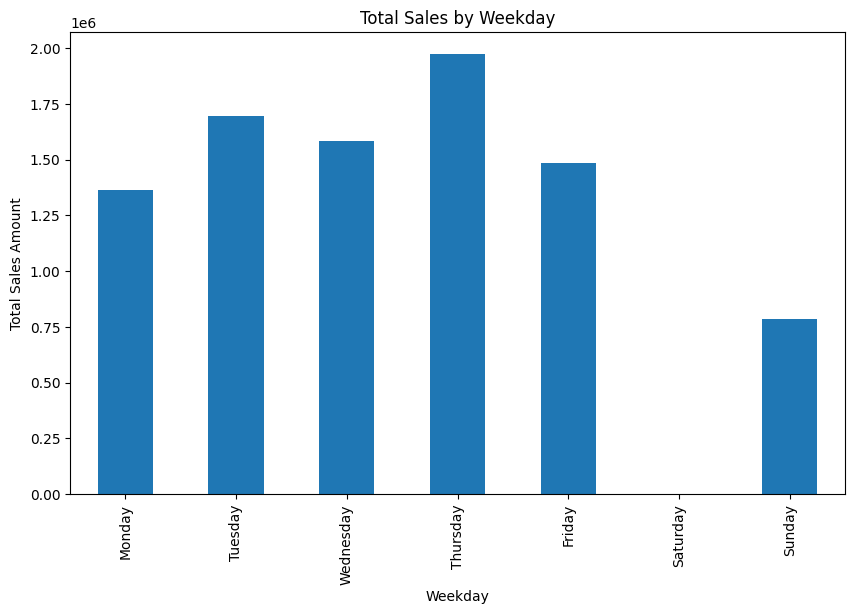

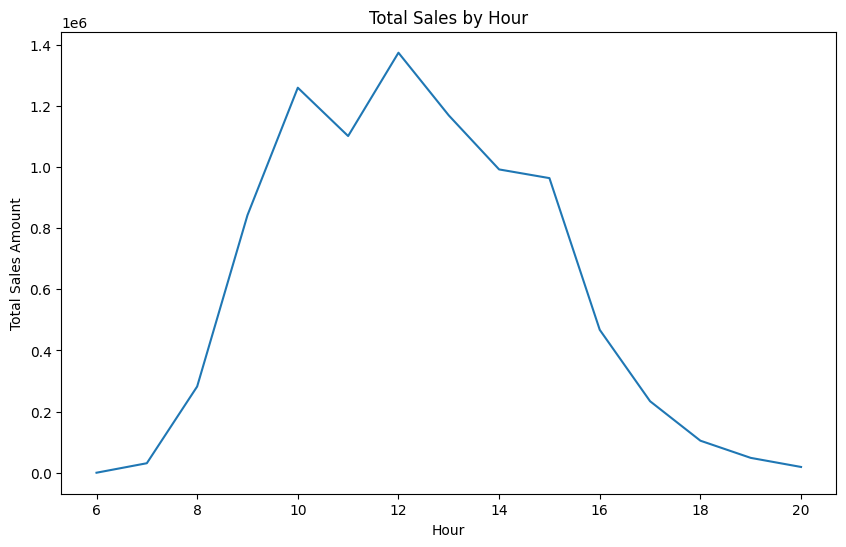

In [44]:
# Sales by weekday
weekday_sales = df.groupby('Weekday')['TotalAmount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', title='Total Sales by Weekday', figsize=(10, 6))
plt.ylabel('Total Sales Amount')
plt.show()

# Sales by hour
hourly_sales = df.groupby('Hour')['TotalAmount'].sum()
hourly_sales.plot(kind='line', title='Total Sales by Hour', figsize=(10, 6))
plt.ylabel('Total Sales Amount')
plt.show()
